In [127]:
from NMF_Implementation.base import load_data
from NMF_Implementation.L2Norm import Algorithm as L2Norm
from NMF_Implementation.L21Norm import Algorithm as L21Norm
from NMF_Implementation.Noise import reconstruction_error_procedure
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

image_size = 30, 37
Xo, Yo = load_data('../data/ORL', image_size)
Xy, Yy = load_data('../data/CroppedYaleB', image_size)

sampleo = Xo  # [np.random.choice(Xo.shape[0], 150, replace=False)]
sampley = Xy  # [np.random.choice(Xy.shape[0], 150, replace=False)]

/home/alexe/Documents/comp5328-a1/Notebooks/NMF_Implementation/base.py:84: UserWarning: could not handle person ../data/ORL/.DS_Store. Skipping...
  warnings.warn(f'could not handle person {person}. Skipping...')
/home/alexe/Documents/comp5328-a1/Notebooks/NMF_Implementation/base.py:84: UserWarning: could not handle person ../data/ORL/README. Skipping...
  warnings.warn(f'could not handle person {person}. Skipping...')
/home/alexe/Documents/comp5328-a1/Notebooks/NMF_Implementation/base.py:84: UserWarning: could not handle person ../data/CroppedYaleB/.DS_Store. Skipping...
  warnings.warn(f'could not handle person {person}. Skipping...')


In [ ]:
# def reconstruction_error_mean_sd(X, modelfactory, noisefunc):
    rv = []
    for run in range(5):
        # observe one experimental result 5 times
        model = modelfactory()
        # save them seperately
        rv.append(dict(
            reconstruction_error=reconstruction_error_procedure(
            X, 0.9, model, noisefunc),
            run=run
        ))
        # the garbage collecter sometimes seems to miss this until
        # later, explicitly free the memory now.
        del model  
        
    # return list of runs
    return rv

In [131]:
krange = np.linspace(1, np.product(image_size), num=30, dtype=int)

In [132]:
def get_ks_noise(nmf_alg, noise):
    datao = []
    print('running on ORL dataset')
    for k in krange:
        # perform one run, fixing k
        res = reconstruction_error_mean_sd(sampleo,
                                           lambda: nmf_alg(k),
                                           noise)
        for r in res: r['k'] = k  # label each run with k
        # add all runs (in one dimension)
        datao.extend(res)
        print(datao[-1], end='\r')
        
    datay = []
    print('running on ORL dataset')
    for k in krange:
        # perform one run, fixing k
        res = reconstruction_error_mean_sd(sampley,
                                           lambda: nmf_alg(k),
                                           noise)
        for r in res: r['k'] = k  # label each run with k
        # add all runs (in one dimension)
        datay.extend(res)
        print(datao[-1], end='\r')
        
    return pd.DataFrame(datao), pd.DataFrame(datay)

In [133]:
orl_k, yale_k = get_ks_noise(L2Norm, lambda x: x)
orl_k.head()

running on ORL dataset
running on ORL dataset': 2.122412854795001e-09, 'run': 4, 'k': 1110}


,reconstruction_error,run,k
0,0.290242,0,1
1,0.294800,1,1
2,0.292158,2,1
3,0.292591,3,1
4,0.292600,4,1


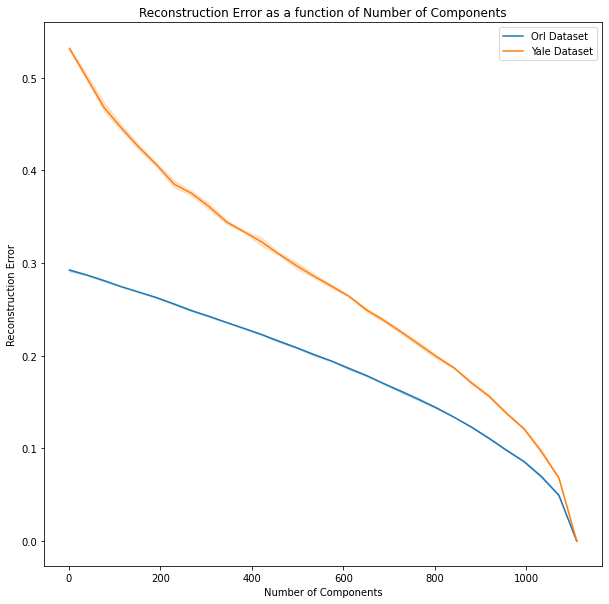

In [147]:
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_ylabel('Reconstruction Error')
ax.set_xlabel('Number of Components')
ax.set_title('Reconstruction Error as a function of Number of Components')
sns.lineplot(data=orl_k, ax=ax, y='reconstruction_error', x='k', label='Orl Dataset')
sns.lineplot(data=yale_k, y='reconstruction_error', x='k', label='Yale Dataset')
plt.savefig('figures/Reconstruction_error_components.png')
plt.show()

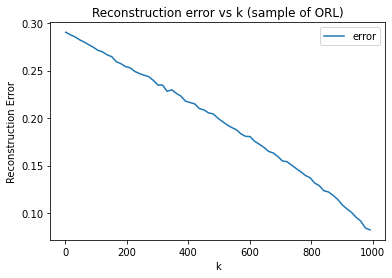

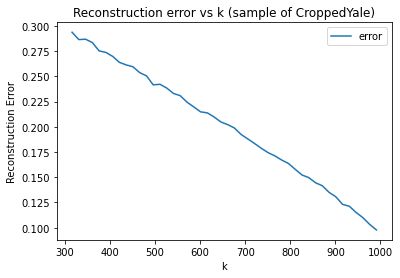